In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salaries-cleaned/Univ_salaries_cleaned3.csv


In [2]:
df = pd.read_csv("../input/salaries-cleaned/Univ_salaries_cleaned3.csv")
df.head()

,Unnamed: 0,Year,Name,Primary Job Title,Base Pay,Department,College,cl_name
0,0,2010,"Abaied, Jamie L.",Assistant Professor,64000.0,Department of Psychological Science,CAS,"Abaied, Jamie L."
1,1,2011,"Abaied, Jamie L.",Assistant Professor,64000.0,Department of Psychological Science,CAS,"Abaied, Jamie L."
2,2,2012,"Abaied, Jamie L.",Assistant Professor,65229.0,Department of Psychological Science,CAS,"Abaied, Jamie L."
3,3,2013,"Abaied, Jamie L.",Assistant Professor,66969.0,Department of Psychological Science,CAS,"Abaied, Jamie L."
4,4,2014,"Abaied, Jamie L.",Assistant Professor,68658.0,Department of Psychological Science,CAS,"Abaied, Jamie L."


In [3]:
A = df[(df['College'] != 'LCOMEO')&(df['College'] != 'Department of Ext')&(df['College'] != 'Learning and Info Tech')&(df['College'] != 'Library')]
A

,Unnamed: 0,Year,Name,Primary Job Title,Base Pay,Department,College,cl_name
0,0,2010,"Abaied, Jamie L.",Assistant Professor,64000.0,Department of Psychological Science,CAS,"Abaied, Jamie L."
1,1,2011,"Abaied, Jamie L.",Assistant Professor,64000.0,Department of Psychological Science,CAS,"Abaied, Jamie L."
2,2,2012,"Abaied, Jamie L.",Assistant Professor,65229.0,Department of Psychological Science,CAS,"Abaied, Jamie L."
3,3,2013,"Abaied, Jamie L.",Assistant Professor,66969.0,Department of Psychological Science,CAS,"Abaied, Jamie L."
4,4,2014,"Abaied, Jamie L.",Assistant Professor,68658.0,Department of Psychological Science,CAS,"Abaied, Jamie L."
...,...,...,...,...,...,...,...,...
14465,14465,2016,"van der Vliet, Albert",Professor,163635.0,Department of Pathology&Laboratory Medicine,COM,"van der Vliet, Albert"
14466,14466,2017,"van der Vliet, Albert",Professor,175294.0,Department of Pathology&Laboratory Medicine,COM,"van der Vliet, Albert"
14467,14467,2018,"van der Vliet, Albert",Professor,191000.0,Department of Pathology&Laboratory Medicine,COM,"van der Vliet, Albert"
14468,14468,2019,"van der Vliet, Albert",Professor,196000.0,Department of Pathology&Laboratory Medicine,COM,"van der Vliet, Albert"


In [4]:
B1 = A['Year'] >= 2017
A = A[B1]
A

,Unnamed: 0,Year,Name,Primary Job Title,Base Pay,Department,College,cl_name
7,7,2017,"Abaied, Jamie L.",Associate Professor,79432.0,Department of Psychological Science,CAS,"Abaied, Jamie L."
8,8,2018,"Abaied, Jamie L.",Associate Professor,84603.0,Department of Psychological Science,CAS,"Abaied, Jamie L."
9,9,2019,"Abaied, Jamie L.",Associate Professor,67200.0,Department of Psychological Science,CAS,"Abaied, Jamie L."
10,10,2020,"Abaied, Jamie L.",Associate Professor,86934.0,Department of Psychological Science,CAS,"Abaied, Jamie L."
17,17,2017,"Abajian, Michael John",Lecturer,47345.0,Department of Nursing,CNHS,"Abajian, Michael J."
...,...,...,...,...,...,...,...,...
14457,14457,2020,"van den Broek-Altenburg, Eline",Assistant Professor,123500.0,Department of Radiology,COM,"van den Broek-Altenburg, Eline"
14466,14466,2017,"van der Vliet, Albert",Professor,175294.0,Department of Pathology&Laboratory Medicine,COM,"van der Vliet, Albert"
14467,14467,2018,"van der Vliet, Albert",Professor,191000.0,Department of Pathology&Laboratory Medicine,COM,"van der Vliet, Albert"
14468,14468,2019,"van der Vliet, Albert",Professor,196000.0,Department of Pathology&Laboratory Medicine,COM,"van der Vliet, Albert"


In [5]:
B = pd.pivot_table(A,index = ['College'],columns = ['Year'],values = ['Base Pay'],aggfunc=np.sum)
B

Base Pay                                    
Year            2017        2018        2019        2020
College                                                 
Business   4438318.0   4936034.0   5111659.0   5121106.0
CALS       5593542.0   6502689.0   7002761.0   7021049.0
CAS       28527010.0  30553777.0  31146783.0  31815535.0
CEMS       7558824.0   8653389.0   9076796.0   9826601.0
CESS       4789916.0   5493019.0   5974718.0   6163987.0
CNHS       3823123.0   4288527.0   4794891.0   5063849.0
COM       39309480.0  43884747.0  49883868.0  52027371.0
RSENR      3058523.0   3302336.0   3320626.0   3424403.0

In [6]:
B['Base Pay','Sum'] = B[('Base Pay',2017)] + B[('Base Pay',2018)] + B[('Base Pay',2019)] +B[('Base Pay',2020)]
B['Base Pay','Sum']

College
Business     19607117.0
CALS         26120041.0
CAS         122043105.0
CEMS         35115610.0
CESS         22421640.0
CNHS         17970390.0
COM         185105466.0
RSENR        13105888.0
Name: (Base Pay, Sum), dtype: float64

In [7]:
B['Base Pay','%'] = round(B['Base Pay','Sum']*100/(B['Base Pay','Sum'].sum()),2)
B

Base Pay                                                        
Year            2017        2018        2019        2020          Sum      %
College                                                                     
Business   4438318.0   4936034.0   5111659.0   5121106.0   19607117.0   4.44
CALS       5593542.0   6502689.0   7002761.0   7021049.0   26120041.0   5.92
CAS       28527010.0  30553777.0  31146783.0  31815535.0  122043105.0  27.64
CEMS       7558824.0   8653389.0   9076796.0   9826601.0   35115610.0   7.95
CESS       4789916.0   5493019.0   5974718.0   6163987.0   22421640.0   5.08
CNHS       3823123.0   4288527.0   4794891.0   5063849.0   17970390.0   4.07
COM       39309480.0  43884747.0  49883868.0  52027371.0  185105466.0  41.93
RSENR      3058523.0   3302336.0   3320626.0   3424403.0   13105888.0   2.97

In [8]:
C = (B['Base Pay',2017].sum(),B['Base Pay',2018].sum(),B['Base Pay',2019].sum(),B['Base Pay',2020].sum())
C

(97098736.0, 107614518.0, 116312102.0, 120463901.0)

In [9]:
D1 = round((C[1]-C[0])*100/C[0],2)
D2 = round((C[2]-C[1])*100/C[1],2)
D3 = round((C[3]-C[2])*100/C[2],2)
D4 = round((D1 + D2 + D3)/3,2)
D4

7.49

In [10]:
B.loc[len(B.index)] = [0,D1,D2,D3,0,D4]

In [11]:
B = B.rename(index={8 : 'Growth'})
B

Base Pay                                                      \
Year            2017         2018         2019         2020          Sum   
College                                                                    
Business   4438318.0   4936034.00   5111659.00   5121106.00   19607117.0   
CALS       5593542.0   6502689.00   7002761.00   7021049.00   26120041.0   
CAS       28527010.0  30553777.00  31146783.00  31815535.00  122043105.0   
CEMS       7558824.0   8653389.00   9076796.00   9826601.00   35115610.0   
CESS       4789916.0   5493019.00   5974718.00   6163987.00   22421640.0   
CNHS       3823123.0   4288527.00   4794891.00   5063849.00   17970390.0   
COM       39309480.0  43884747.00  49883868.00  52027371.00  185105466.0   
RSENR      3058523.0   3302336.00   3320626.00   3424403.00   13105888.0   
Growth           0.0        10.83         8.08         3.57          0.0   

                 
Year          %  
College          
Business   4.44  
CALS       5.92  
CAS       27.64  
CEMS       7.95  
CESS       5.08  
CNHS       4.07  
COM       41.93  
RSENR      2.97  
Growth     7.49

In [12]:
import matplotlib.pyplot as plt

In [13]:
B

Base Pay                                                      \
Year            2017         2018         2019         2020          Sum   
College                                                                    
Business   4438318.0   4936034.00   5111659.00   5121106.00   19607117.0   
CALS       5593542.0   6502689.00   7002761.00   7021049.00   26120041.0   
CAS       28527010.0  30553777.00  31146783.00  31815535.00  122043105.0   
CEMS       7558824.0   8653389.00   9076796.00   9826601.00   35115610.0   
CESS       4789916.0   5493019.00   5974718.00   6163987.00   22421640.0   
CNHS       3823123.0   4288527.00   4794891.00   5063849.00   17970390.0   
COM       39309480.0  43884747.00  49883868.00  52027371.00  185105466.0   
RSENR      3058523.0   3302336.00   3320626.00   3424403.00   13105888.0   
Growth           0.0        10.83         8.08         3.57          0.0   

                 
Year          %  
College          
Business   4.44  
CALS       5.92  
CAS       27.64  
CEMS       7.95  
CESS       5.08  
CNHS       4.07  
COM       41.93  
RSENR      2.97  
Growth     7.49

In [14]:
test = B.reset_index()
test

College    Base Pay                                         \
Year                  2017         2018         2019         2020   
0     Business   4438318.0   4936034.00   5111659.00   5121106.00   
1         CALS   5593542.0   6502689.00   7002761.00   7021049.00   
2          CAS  28527010.0  30553777.00  31146783.00  31815535.00   
3         CEMS   7558824.0   8653389.00   9076796.00   9826601.00   
4         CESS   4789916.0   5493019.00   5974718.00   6163987.00   
5         CNHS   3823123.0   4288527.00   4794891.00   5063849.00   
6          COM  39309480.0  43884747.00  49883868.00  52027371.00   
7        RSENR   3058523.0   3302336.00   3320626.00   3424403.00   
8       Growth         0.0        10.83         8.08         3.57   

                          
Year          Sum      %  
0      19607117.0   4.44  
1      26120041.0   5.92  
2     122043105.0  27.64  
3      35115610.0   7.95  
4      22421640.0   5.08  
5      17970390.0   4.07  
6     185105466.0  41.93  
7      13105888.0   2.97  
8             0.0   7.49

In [15]:
test1 = test.drop([('Base Pay','Sum'),('Base Pay','%')],axis = 1)
test1 = test1.drop(8)
test1

College    Base Pay                                    
Year                  2017        2018        2019        2020
0     Business   4438318.0   4936034.0   5111659.0   5121106.0
1         CALS   5593542.0   6502689.0   7002761.0   7021049.0
2          CAS  28527010.0  30553777.0  31146783.0  31815535.0
3         CEMS   7558824.0   8653389.0   9076796.0   9826601.0
4         CESS   4789916.0   5493019.0   5974718.0   6163987.0
5         CNHS   3823123.0   4288527.0   4794891.0   5063849.0
6          COM  39309480.0  43884747.0  49883868.0  52027371.0
7        RSENR   3058523.0   3302336.0   3320626.0   3424403.0

<AxesSubplot:xlabel='College'>

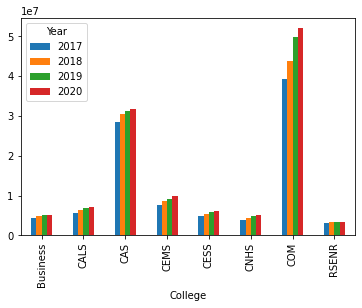

In [16]:
test1.plot(x='College',y='Base Pay',kind = 'bar')

In [17]:
E = A.groupby(['Year','College'])[['cl_name']].count()


In [18]:
E1 = pd.pivot_table(E,index = ['College'],columns = ['Year'],values = ['cl_name'])
E1

cl_name               
Year        2017 2018 2019 2020
College                        
Business      31   36   38   39
CALS          76   84   89   90
CAS          339  345  349  359
CEMS          83   95  100  108
CESS          78   83   87  100
CNHS          64   66   72   82
COM          660  742  820  901
RSENR         45   45   48   50

In [19]:
E1['cl_name','B1718'] = (E1['cl_name',2018] - E1['cl_name',2017])
E1['cl_name','B1819'] = (E1['cl_name',2019] - E1['cl_name',2018])
E1['cl_name','B1920'] = (E1['cl_name',2020] - E1['cl_name',2019])

In [20]:
E_reset = E1.reset_index()
E_reset

College cl_name                                 
Year              2017 2018 2019 2020 B1718 B1819 B1920
0     Business      31   36   38   39     5     2     1
1         CALS      76   84   89   90     8     5     1
2          CAS     339  345  349  359     6     4    10
3         CEMS      83   95  100  108    12     5     8
4         CESS      78   83   87  100     5     4    13
5         CNHS      64   66   72   82     2     6    10
6          COM     660  742  820  901    82    78    81
7        RSENR      45   45   48   50     0     3     2

In [21]:
E_reset.index

RangeIndex(start=0, stop=8, step=1)

In [22]:
E1 = E_reset.drop([('cl_name',2017),('cl_name',2018),('cl_name',2019),('cl_name',2020)],axis = 1)
E1

College cl_name            
Year             B1718 B1819 B1920
0     Business       5     2     1
1         CALS       8     5     1
2          CAS       6     4    10
3         CEMS      12     5     8
4         CESS       5     4    13
5         CNHS       2     6    10
6          COM      82    78    81
7        RSENR       0     3     2

In [23]:
E_reset[('cl_name','E_max')] = E1.max(1)
E_reset

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


College cl_name                                       
Year              2017 2018 2019 2020 B1718 B1819 B1920 E_max
0     Business      31   36   38   39     5     2     1     5
1         CALS      76   84   89   90     8     5     1     8
2          CAS     339  345  349  359     6     4    10    10
3         CEMS      83   95  100  108    12     5     8    12
4         CESS      78   83   87  100     5     4    13    13
5         CNHS      64   66   72   82     2     6    10    10
6          COM     660  742  820  901    82    78    81    82
7        RSENR      45   45   48   50     0     3     2     3

In [24]:
E_reset.drop([('cl_name','B1718'),('cl_name','B1819'),('cl_name','B1920')],axis = 1)

College cl_name                     
Year              2017 2018 2019 2020 E_max
0     Business      31   36   38   39     5
1         CALS      76   84   89   90     8
2          CAS     339  345  349  359    10
3         CEMS      83   95  100  108    12
4         CESS      78   83   87  100    13
5         CNHS      64   66   72   82    10
6          COM     660  742  820  901    82
7        RSENR      45   45   48   50     3